### Download dataset

- https://www.ucl.ac.uk/drc/research/research-methods/minimal-interval-resonance-imaging-alzheimers-disease-miriad
- move MIRIAD.tgz to `<repository_root>/data` (create the folder if it does not exist) and extract it using `tar zxvf backups.tgz` 

### Load test file

In [20]:
import nibabel as nib
import matplotlib.pyplot as plt

file_path = "data/miriad/miriad_188_AD_M/miriad_188_AD_M_01_MR_1/miriad_188_AD_M_01_MR_1.nii"
mri = nib.load(file_path)
print(type(mri))

<class 'nibabel.nifti1.Nifti1Image'>


In [21]:
print(mri.shape)

(256, 256, 124)


In [22]:
mri_data = mri.get_fdata()
print(type(mri_data))  # it's a numpy array!
print(mri_data.shape)

<class 'numpy.memmap'>
(256, 256, 124)


In [23]:
mri_data_slice = mri_data[:, :, 64]
print(mri_data_slice.shape)

(256, 256)


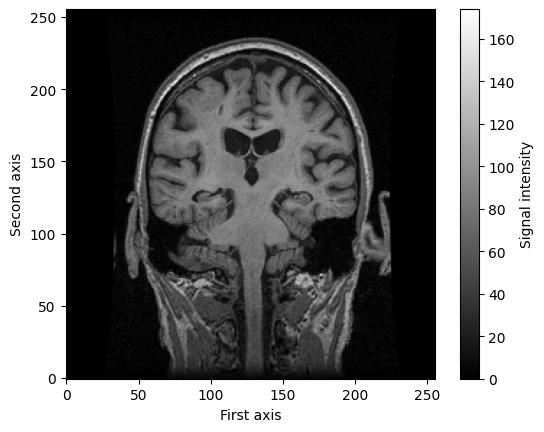

In [24]:
plt.imshow(mri_data_slice.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

### Pytorch Dataset

In [1]:
from miriad import MiriadDataset

miriad_train_dataset = MiriadDataset(root="data/miriad", train=True)
miriad_val_dataset = MiriadDataset(root="data/miriad", train=False)

print(f"Training set size = {len(miriad_train_dataset)}")
positive_class_count = 0
negative_class_count = 0
for mri, label in miriad_train_dataset:
    positive_class_count += label
    negative_class_count += 1 - label
print(f"Positive instances in training set = {positive_class_count}")
print(f"Negative instances in training set = {negative_class_count}")
print(f"Validation set size = {len(miriad_val_dataset)}")
positive_class_count = 0
negative_class_count = 0
for mri, label in miriad_val_dataset:
    positive_class_count += label
    negative_class_count += 1 - label
print(f"Positive instances in validation set = {positive_class_count}")
print(f"Negative instances in validation set = {negative_class_count}")

Training set size = 320
Positive instances in training set = 157
Negative instances in training set = 163
Validation set size = 80
Positive instances in validation set = 39
Negative instances in validation set = 41


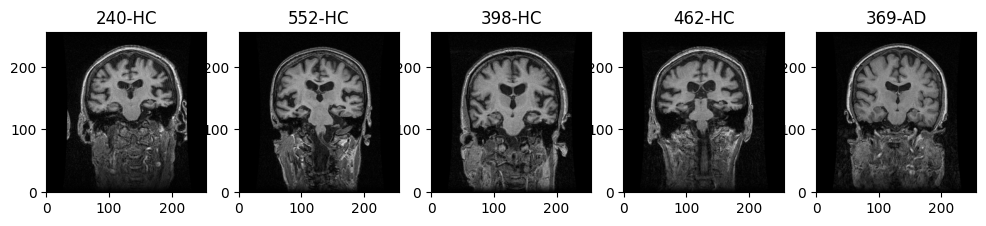

In [5]:
import random

plt.figure(figsize=(12, 6))

labels = ["AD", "HC"]

indices = random.sample(range(0, len(miriad_train_dataset)), 5)
for i, sample_index in enumerate(indices):
    sample_data, sample_label = miriad_train_dataset[sample_index]  # Get the i-th sample and its label
    mri_sample_slice = sample_data[:, :, 64]

    plt.subplot(1, 5, i+1)  # Create a subplot for each sample
    plt.imshow(mri_sample_slice.T, cmap='gray', origin='lower')
    plt.title(f"{sample_index}-{labels[sample_label]}")  # Display the label as the title

plt.show()

4


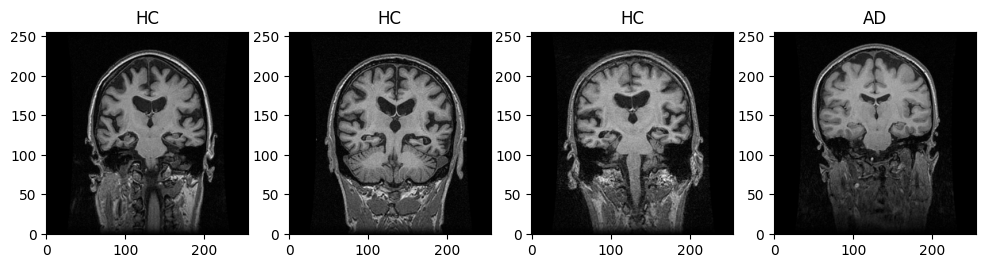

In [18]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Create a DataLoader using the sampler
batch_size = 4
train_loader = DataLoader(miriad_train_dataset, batch_size=batch_size, shuffle=True)

dataiter = iter(train_loader)
mris, labels = next(dataiter)
print(len(labels))

plt.figure(figsize=(12, 6))
labels_str = ["AD", "HC"]
i = 0
for sample_data, sample_label in zip(mris, labels):
    mri_sample_slice = sample_data[:, :, 64]
    plt.subplot(1, batch_size, i+1)  # Create a subplot for each sample
    plt.imshow(mri_sample_slice.T, cmap='gray', origin='lower')
    plt.title(f"{labels_str[sample_label]}")  # Display the label as the title
    i += 1
plt.show()

# TODO: 3D-CNN classifier
# TODO: Swin-Transformer Classifier (10%, )
# TODO: Pre-train Swin